# Detecção de Anomalias com Isolation Forest e DBSCAN

In [2]:
# bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carrega os dados
df = pd.read_csv('../../datasets/sensores_anomalias.csv')

In [4]:
df.head()

,timestamp,sensor_1,sensor_2,sensor_3,anomaly_real
0,2023-01-01 00:00:00,52.483571,72.587639,105.575635,0
1,2023-01-01 01:00:00,49.308678,78.520554,97.329444,0
2,2023-01-01 02:00:00,53.238443,62.484606,109.384997,0
3,2023-01-01 03:00:00,57.615149,89.437646,102.957138,0
4,2023-01-01 04:00:00,48.829233,74.178488,99.141583,0


In [5]:
df.describe()

,sensor_1,sensor_2,sensor_3,anomaly_real
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.417103,72.877619,102.753183,0.050000
std,12.307842,15.807649,14.768605,0.218054
min,33.793663,-24.867040,75.843903,0.000000
25%,46.995472,67.972533,95.128275,0.000000
50%,50.382932,74.826353,100.676579,0.000000
75%,53.805428,81.778880,106.240400,0.000000
max,178.524754,106.931076,210.291917,1.000000


In [8]:
# Pré Processamento
X = df.drop(columns=['timestamp'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_iso'] = iso.fit_predict(X_scaled)
df['anomaly_iso'] = df['anomaly_iso'].map({1:0,-1:1})

In [11]:
# DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
df['anomaly_dbscan'] = db.fit_predict(X_scaled)
df['anomaly_dbscan'] = df['anomaly_dbscan'].apply(lambda x:1 if x == -1 else 0)

In [12]:
# Visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'],df['pca2'] = X_pca[:,0], X_pca[:,1]

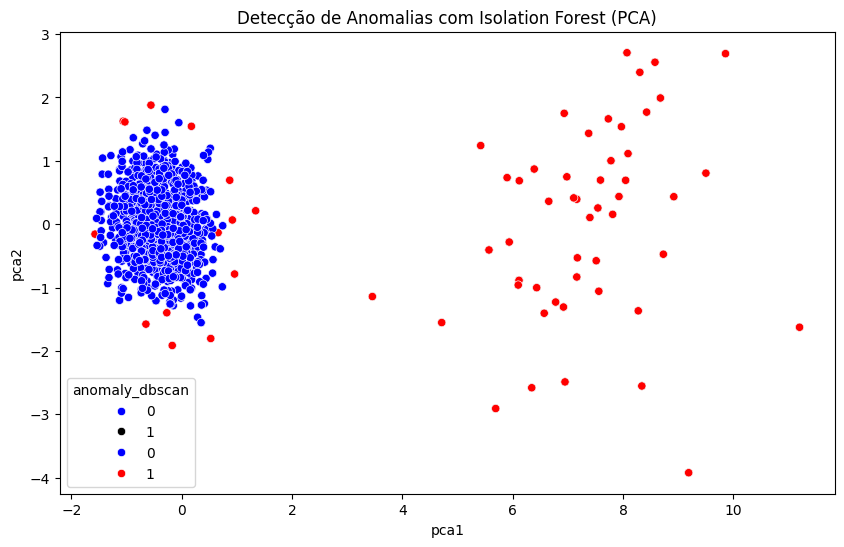

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='anomaly_iso', data=df, palette={0:'blue', 1:'black'})
sns.scatterplot(x='pca1', y='pca2', hue='anomaly_dbscan', data=df, palette={0:'blue', 1:'red'})
plt.title('Detecção de Anomalias com Isolation Forest (PCA)')
plt.show()

In [14]:
# Comparação
df['anomaly_iso'].value_counts()

anomaly_iso
0    950
1     50
Name: count, dtype: int64

In [15]:
df['anomaly_dbscan'].value_counts()

anomaly_dbscan
0    936
1     64
Name: count, dtype: int64